##1 Import

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.base.datetools import dates_from_str
import statsmodels.datasets.interest_inflation.data as d

In [3]:
# charger les donnée
df=d.load_pandas().data
df.head()

,year,quarter,Dp,R
0,1972.0,2.0,-0.003133,0.083
1,1972.0,3.0,0.018871,0.083
2,1972.0,4.0,0.024804,0.087
3,1973.0,1.0,0.016278,0.087
4,1973.0,2.0,0.000290,0.102


In [4]:
dates = df[['year','quarter']].astype(int).astype(str)
quarterly = dates['year']+'Q'+ dates['quarter']
quarterly = dates_from_str(quarterly)

In [5]:
data = df[['Dp','R']]
data.index = pd.DatetimeIndex(quarterly)

In [6]:
data

,Dp,R
1972-06-30,-0.003133,0.083
1972-09-30,0.018871,0.083
1972-12-31,0.024804,0.087
1973-03-31,0.016278,0.087
1973-06-30,0.000290,0.102
...,...,...
1997-12-31,0.024245,0.051
1998-03-31,-0.014647,0.047
1998-06-30,-0.002049,0.047
1998-09-30,0.002475,0.041


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 1972-06-30 to 1998-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dp      107 non-null    float64
 1   R       107 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [8]:
data.isna().sum()

Dp    0
R     0
dtype: int64

<Axes: >

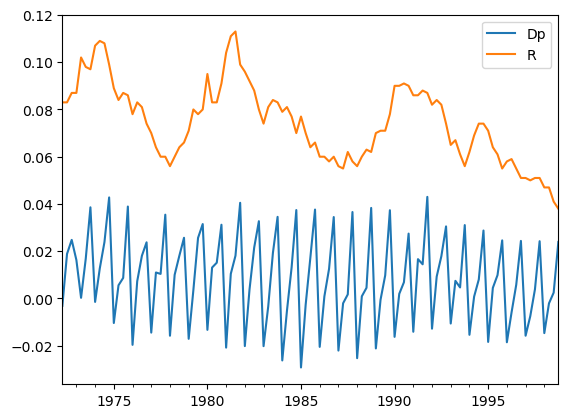

In [9]:
data.plot()

In [10]:
df = data.copy()

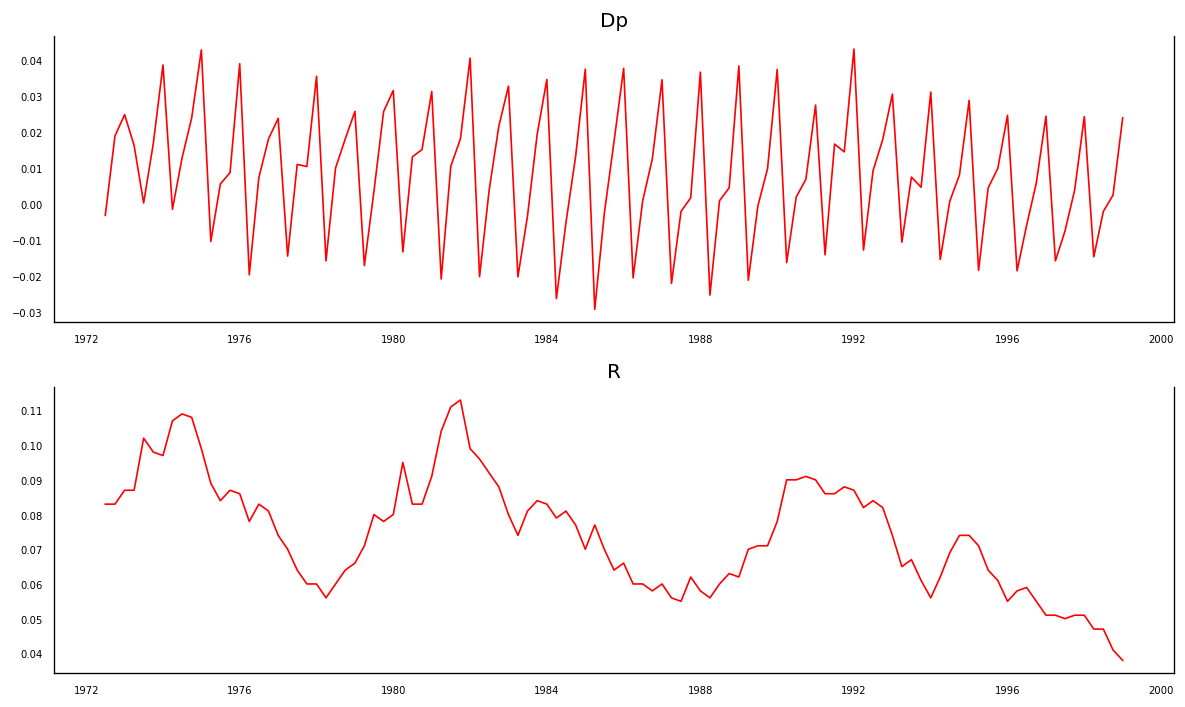

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

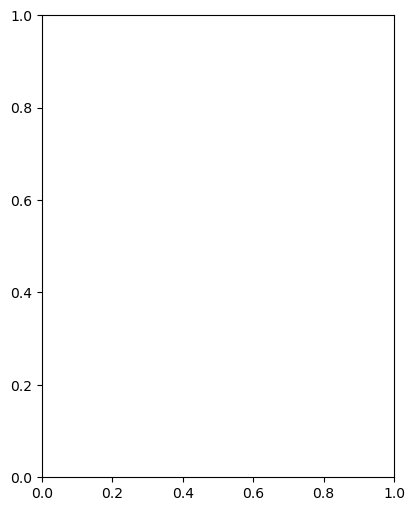

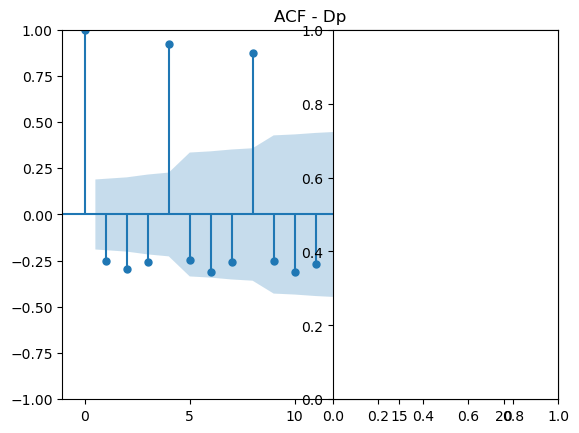

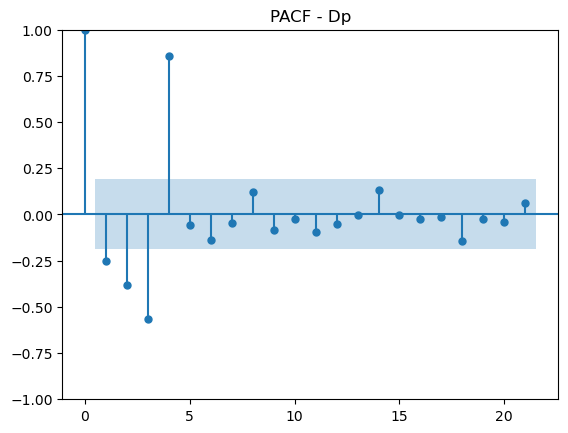

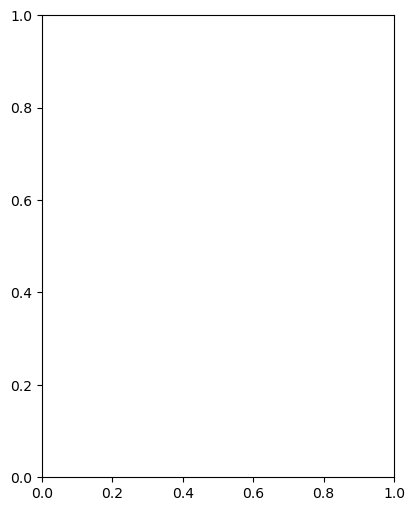

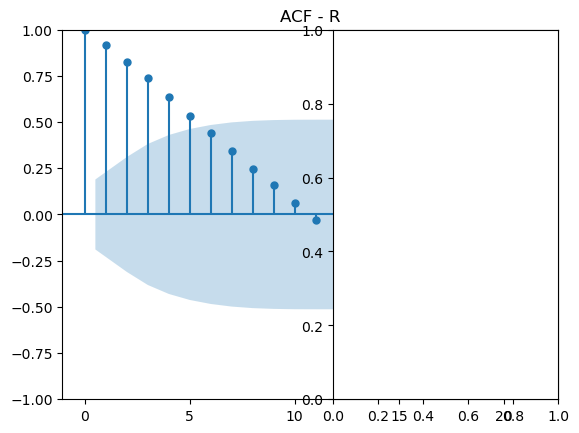

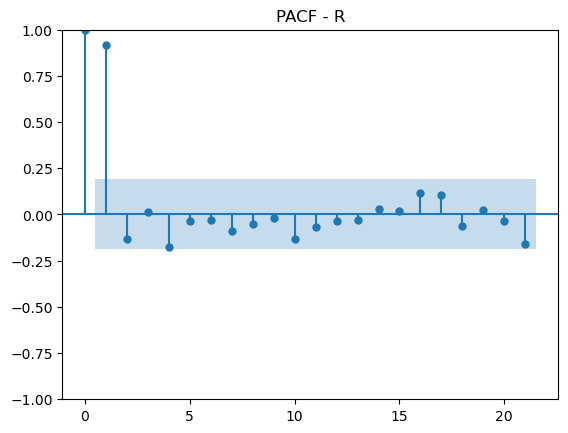

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(),title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(),title=f"PACF - {col}")
    plt.show()

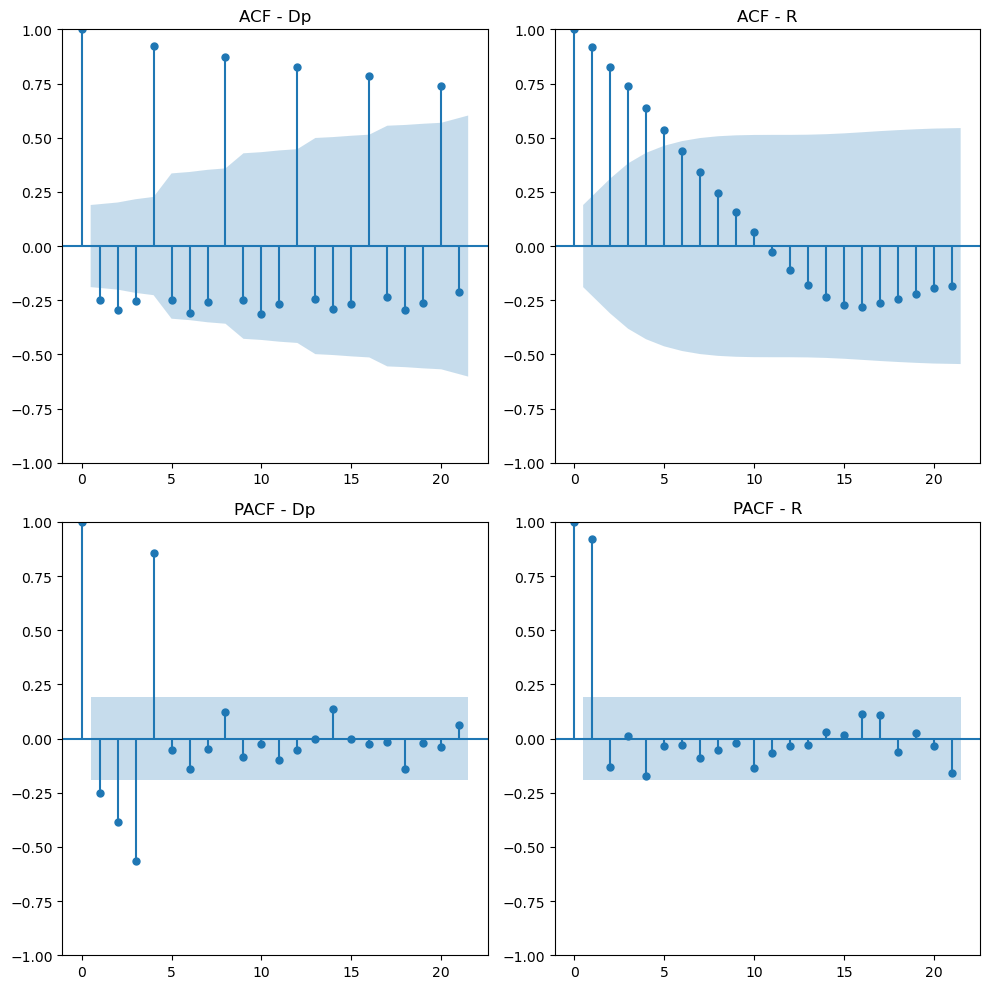

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Définir le nombre de colonnes
n_cols = len(df.columns)

# Créer une figure avec deux lignes (une pour ACF, une pour PACF)
fig, axes = plt.subplots(2, n_cols, figsize=(5 * n_cols, 10))

# Parcourir chaque colonne pour tracer ACF et PACF
for i, col in enumerate(df.columns):
    plot_acf(df[col].dropna(), ax=axes[0, i])
    axes[0, i].set_title(f"ACF - {col}")
    
    plot_pacf(df[col].dropna(), ax=axes[1, i])
    axes[1, i].set_title(f"PACF - {col}")

# Ajuster l'affichage
plt.tight_layout()
plt.show()


stationarité

In [15]:
# stationarité
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Dp - Series is not Stationary
R - Series is not Stationary


In [16]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

Dp - Series is Stationary
R - Series is not Stationary


In [17]:
# 1st difference
df_differenced = df.diff().dropna()

In [18]:
df = df_differenced.copy()

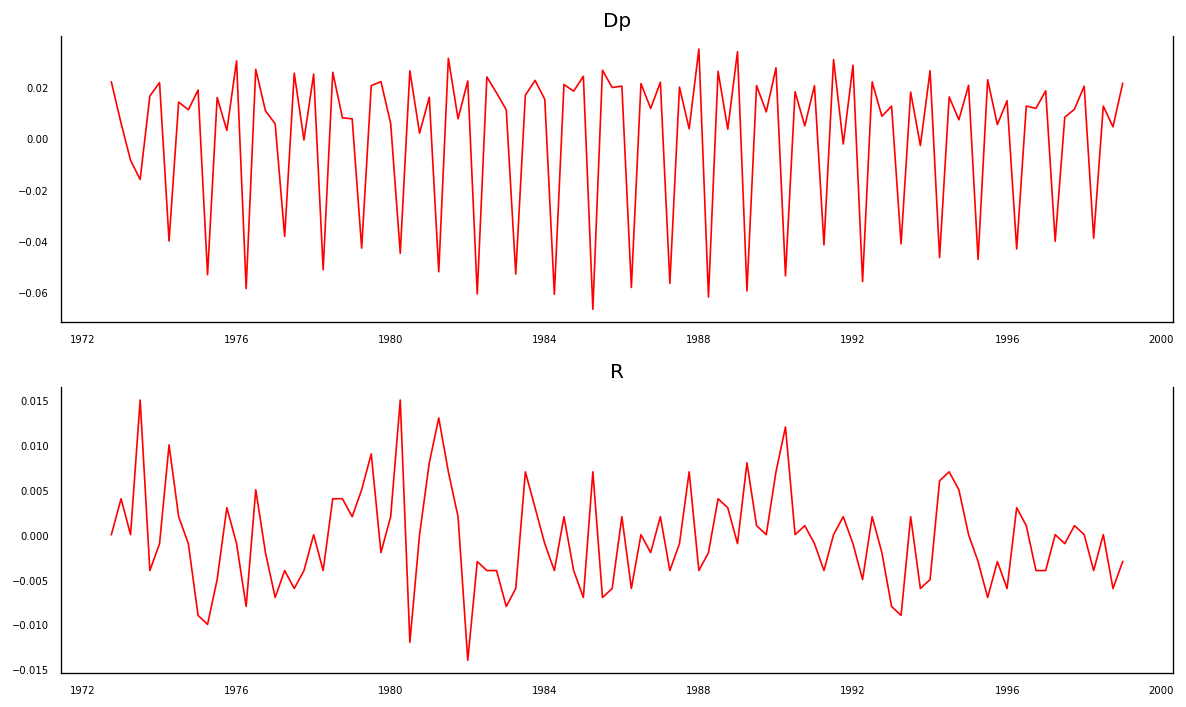

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

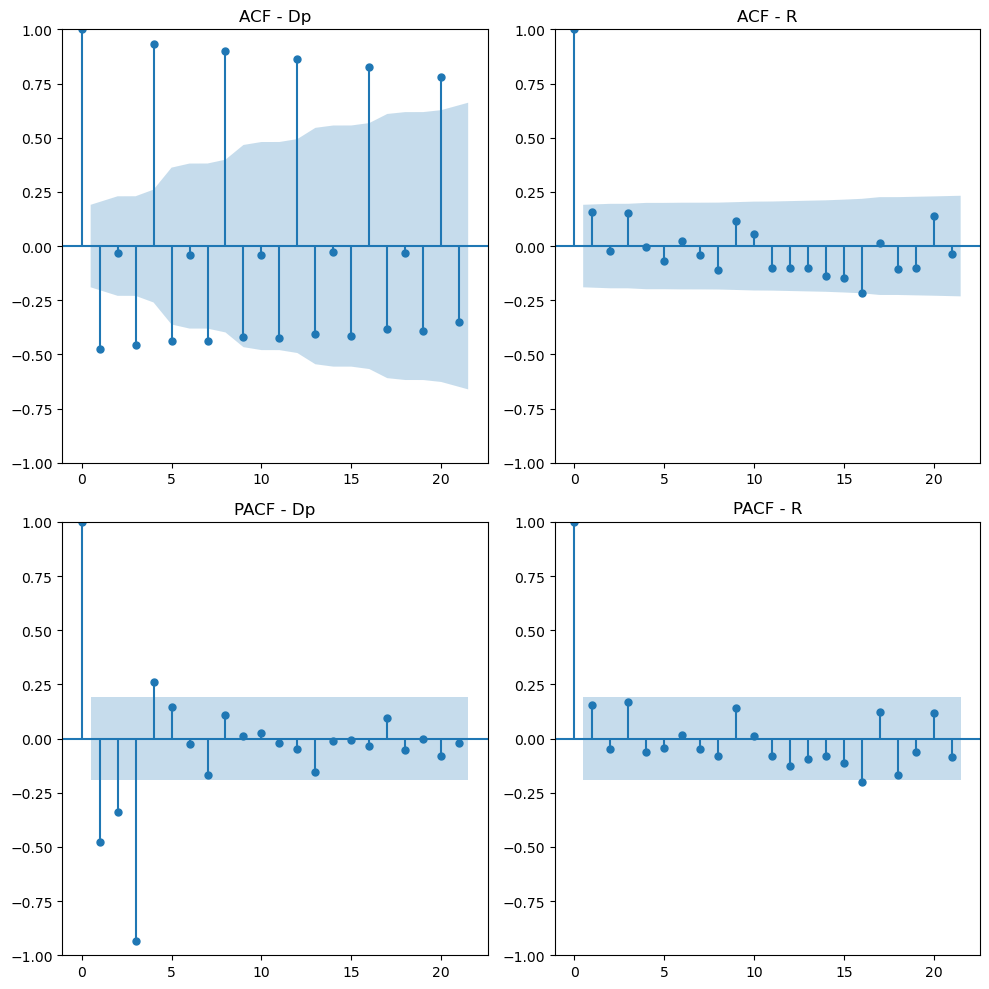

In [20]:
# Définir le nombre de colonnes
n_cols = len(df.columns)

# Créer une figure avec deux lignes (une pour ACF, une pour PACF)
fig, axes = plt.subplots(2, n_cols, figsize=(5 * n_cols, 10))

# Parcourir chaque colonne pour tracer ACF et PACF
for i, col in enumerate(df.columns):
    plot_acf(df[col].dropna(), ax=axes[0, i])
    axes[0, i].set_title(f"ACF - {col}")
    
    plot_pacf(df[col].dropna(), ax=axes[1, i])
    axes[1, i].set_title(f"PACF - {col}")

# Ajuster l'affichage
plt.tight_layout()
plt.show()

In [21]:
# stationarité
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Dp - Series is Stationary
R - Series is Stationary


In [22]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

Dp - Series is Stationary
R - Series is Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_6988\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_6988\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])


cointegration

In [24]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)  

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Dp     ::  40.79     > 12.3212   =>   True
R      ::  12.76     > 4.1296    =>   True


5 choix de l'ordre et estimation du modele 

In [26]:
from statsmodels.tsa.vector_ar.vecm import VECM,select_order, select_coint_rank

# sélection du meilleur ordre

order_result = select_order(df[['Dp','R']].dropna(),maxlags=10,deterministic ="ci",seasons=4)
order_result.summary()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

,AIC,BIC,FPE,HQIC
0,-20.31,-19.93,1.518e-09,-20.15
1,-20.38,-19.90,1.411e-09,-20.18
2,-20.66*,-20.06*,1.072e-09*,-20.42*
3,-20.62,-19.92,1.111e-09,-20.34
4,-20.56,-19.75,1.183e-09,-20.23
5,-20.50,-19.58,1.264e-09,-20.13
6,-20.50,-19.48,1.260e-09,-20.09
7,-20.47,-19.34,1.303e-09,-20.02
8,-20.43,-19.19,1.369e-09,-19.93
9,-20.37,-19.02,1.465e-09,-19.82


6 Estimation du modele 

Quel det_order choisir ?
Si les séries semblent osciller autour d'une valeur moyenne (sans tendance apparente) → det_order=-1

Si les séries sont déjà stationnaires et n'ont pas besoin de correction → det_order=0

Si les séries montrent une tendance croissante ou décroissante → Il faudrait tester det_order=1 (constante dans l'équation VAR) ou det_order=2 (tendance linéaire dans la co-intégration).

In [28]:
#By nathacha

rank_test = select_coint_rank(df[['Dp','R']], det_order=0, k_ar_diff=3,method="trace",signif=0.05)
print(rank_test)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          106.6          15.49
  1   2          22.55          3.841
-------------------------------------


In [29]:
rank_test.rank

2

In [30]:
# Test de co-intégration de Johansen pour estimer le rang (nombre de relations de co-intégration)
rank_test = select_coint_rank(df, det_order=0, k_ar_diff=order_result.selected_orders['aic'])


In [31]:
rank_test.rank

2

In [32]:
model = VECM(df,deterministic ="ci",seasons=4,k_ar_diff=order_result.selected_orders['aic'], coint_rank = rank_test.rank) #=1
model_fit = model.fit()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [33]:
# affichage du sommaire
print(model_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Dp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season1        0.0014      0.005      0.278      0.781      -0.008       0.011
season2        0.0183      0.005      3.669      0.000       0.009       0.028
season3       -0.0165      0.005     -3.400      0.001      -0.026      -0.007
L1.Dp          1.1952      0.137      8.742      0.000       0.927       1.463
L1.R          -0.1722      0.124     -1.389      0.165      -0.415       0.071
L2.Dp          0.4936      0.070      7.063      0.000       0.357       0.631
L2.R          -0.0888      0.096     -0.924      0.356      -0.277       0.100
Det. terms outside the coint. relation & lagged endog. parameters for equation R
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

--- Résultats du test de Ljung-Box ---
       lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
Dp  0.571447  0.828308  0.839420  0.435195  0.564199  0.352511  0.375410   
R   0.840694  0.963587  0.994208  0.943097  0.942371  0.974109  0.981067   

       lag_8     lag_9    lag_10    lag_11    lag_12  
Dp  0.320978  0.396361  0.349480  0.415620  0.363145  
R   0.947619  0.682550  0.667323  0.670608  0.641457  


<Figure size 1000x500 with 0 Axes>

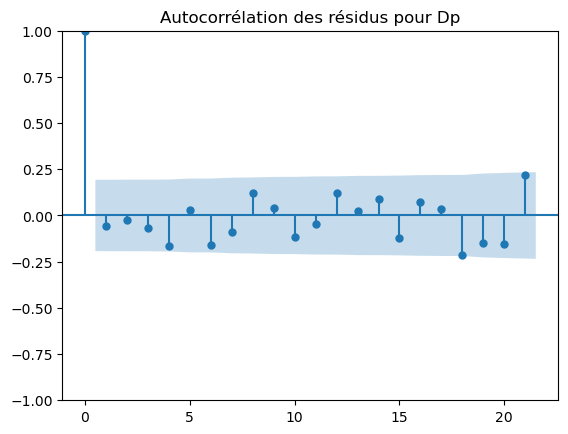

<Figure size 1000x500 with 0 Axes>

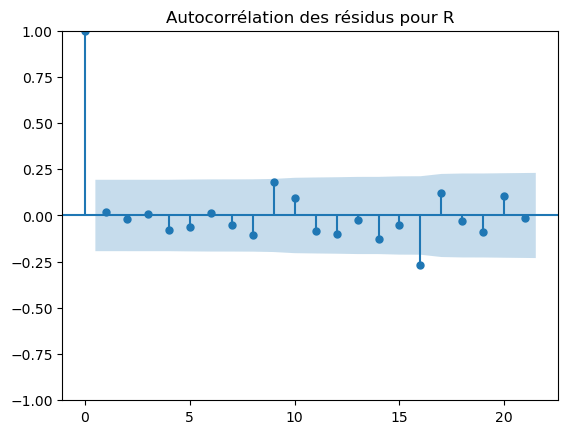

In [34]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# Extraction des résidus du modèle
residuals = model_fit.resid  # residuals est un numpy array

# DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

# Test de Ljung-Box pour chaque variable et chaque lag de 1 à 12
for i, column in enumerate(df.columns):
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        # Ajout des résultats dans le DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = ljung_box['lb_pvalue'].values[0]

# Affichage des résultats
print('--- Résultats du test de Ljung-Box ---')
print(ljung_box_results)

# Affichage des autocorrélations des résidus
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrélation des résidus pour {column}')
    plt.show()



🔍 Analyse des résidus pour Dp :
✅ Lag 1 : p-value = 0.5714 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 2 : p-value = 0.8283 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 3 : p-value = 0.8394 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 4 : p-value = 0.4352 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 5 : p-value = 0.5642 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 6 : p-value = 0.3525 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 7 : p-value = 0.3754 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 8 : p-value = 0.3210 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 9 : p-value = 0.3964 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 10 : p-value = 0.3495 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 11 : p-value = 0.4156 (≥ 0.05) → Pas d'autocorrélation détectée ✔️
✅ Lag 12 : p-value = 0.3631 (≥ 0.05) → Pas d'autocorrélation détectée ✔️

🔍 Analyse des résidus pour R :
✅ Lag 1 : p-value = 0.8407 (≥ 0.05) → Pas d'autocorrélation détectée

<Figure size 1000x500 with 0 Axes>

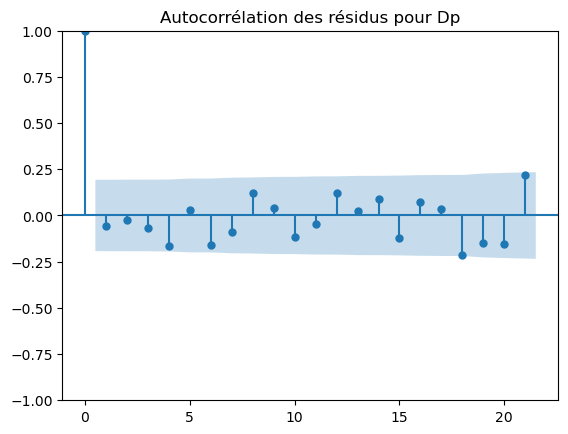

<Figure size 1000x500 with 0 Axes>

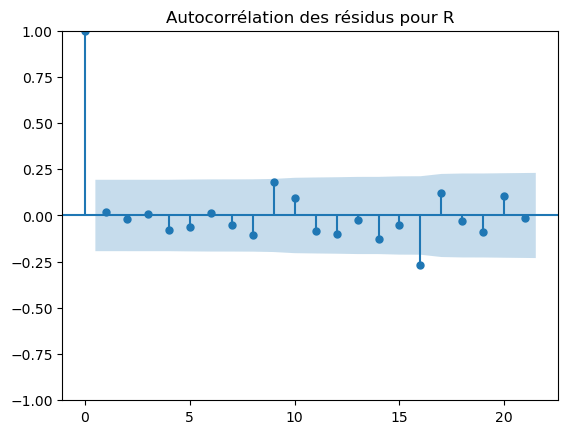

In [35]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# Définition du seuil de signification
alpha = 0.05  

# Extraction des résidus du modèle
residuals = model_fit.resid  # residuals est un numpy array

# DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

# Test de Ljung-Box pour chaque variable et chaque lag de 1 à 12
for i, column in enumerate(df.columns):
    print(f"\n🔍 Analyse des résidus pour {column} :")
    
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        p_value = ljung_box['lb_pvalue'].values[0]
        
        # Stockage des résultats dans le DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = p_value

        # Interprétation du test de Ljung-Box
        if p_value < alpha:
            print(f"⚠️ Lag {lag} : p-value = {p_value:.4f} (< {alpha}) → Autocorrélation significative ❌")
        else:
            print(f"✅ Lag {lag} : p-value = {p_value:.4f} (≥ {alpha}) → Pas d'autocorrélation détectée ✔️")

# Affichage des résultats finaux sous forme de tableau
print("\n--- Résultats du test de Ljung-Box ---")
print(ljung_box_results)

# Affichage des autocorrélations des résidus
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrélation des résidus pour {column}')
    plt.show()


In [36]:
from scipy.stats import jarque_bera

# Appliquer le test de Jarque-Bera
jb_stat, p_value = jarque_bera(residuals)

print(f"Statistique de Jarque-Bera : {jb_stat}")
print(f"P-value : {p_value}")

# Interprétation
if p_value > 0.05:
    print("On ne rejette pas H0 : la série suit une distribution normale.")
else:
    print("On rejette H0 : la série ne suit PAS une distribution normale.")

Statistique de Jarque-Bera : 0.5691584529299878
P-value : 0.7523307485970862
On ne rejette pas H0 : la série suit une distribution normale.


In [37]:
# analyse de la stabilité

eigenvalues = model_fit.alpha @ model_fit.beta.T
print('--- Valeur propres de la matrice de transition')
print(eigenvalues)

--- Valeur propres de la matrice de transition
[[-3.00149681  0.35413037]
 [ 0.06204539 -0.70538502]]


7 Prevision

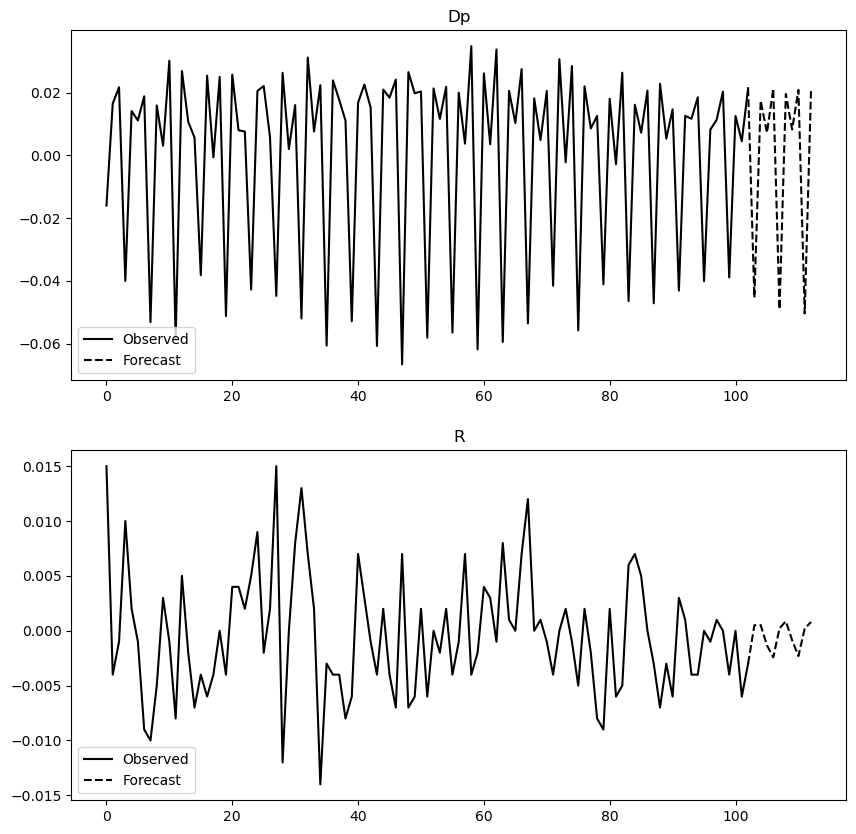

In [82]:
model_fit.plot_forecast(steps=10,plot_conf_int=False)

In [84]:
# 10 minute, il faut continuer